<a href="https://colab.research.google.com/github/Radomir21/DigiJed_winter_course/blob/main/DigiJed_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0) Prepocessing

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
#імпортування бібілотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score

In [4]:
df = pd.read_excel("/content/drive/MyDrive/Data Analyzis/data.xlsx")
df

,Глюкоза (gl),3h,6h,12h,24h,36h,48h
0,1,11.1,10.3,12.1,12.0,10.3,10.5
1,2,10.9,11.0,8.9,11.2,8.2,11.3
2,3,11.0,12.0,12.1,11.9,12.1,NaN
3,4,11.0,10.1,10.6,7.2,8.8,13.2
4,5,10.4,10.0,11.1,7.4,11.4,12.0
5,6,11.1,9.9,11.0,11.9,14.2,14.6
6,7,8.0,11.2,11.1,11.1,16.0,14.6
7,8,10.0,11.0,11.0,9.2,9.3,11.3
8,9,9.9,11.8,11.7,11.8,12.0,12.1
9,10,10.0,11.1,9.7,6.8,11.2,12.3


In [5]:
df.dtypes

,0
Глюкоза (gl),int64
3h,float64
6h,float64
12h,float64
24h,float64
36h,float64
48h,float64


In [6]:
df.isnull().sum()

,0
Глюкоза (gl),0
3h,0
6h,0
12h,0
24h,0
36h,0
48h,1


In [7]:
df.dropna(inplace=True)
df

,Глюкоза (gl),3h,6h,12h,24h,36h,48h
0,1,11.1,10.3,12.1,12.0,10.3,10.5
1,2,10.9,11.0,8.9,11.2,8.2,11.3
3,4,11.0,10.1,10.6,7.2,8.8,13.2
4,5,10.4,10.0,11.1,7.4,11.4,12.0
5,6,11.1,9.9,11.0,11.9,14.2,14.6
6,7,8.0,11.2,11.1,11.1,16.0,14.6
7,8,10.0,11.0,11.0,9.2,9.3,11.3
8,9,9.9,11.8,11.7,11.8,12.0,12.1
9,10,10.0,11.1,9.7,6.8,11.2,12.3
10,11,8.8,11.0,8.8,10.3,12.2,13.2


In [8]:
df.drop(columns=['Глюкоза (gl)'], inplace=True)
df

,3h,6h,12h,24h,36h,48h
0,11.1,10.3,12.1,12.0,10.3,10.5
1,10.9,11.0,8.9,11.2,8.2,11.3
3,11.0,10.1,10.6,7.2,8.8,13.2
4,10.4,10.0,11.1,7.4,11.4,12.0
5,11.1,9.9,11.0,11.9,14.2,14.6
6,8.0,11.2,11.1,11.1,16.0,14.6
7,10.0,11.0,11.0,9.2,9.3,11.3
8,9.9,11.8,11.7,11.8,12.0,12.1
9,10.0,11.1,9.7,6.8,11.2,12.3
10,8.8,11.0,8.8,10.3,12.2,13.2


#1) Матриця діаграм розсіювання

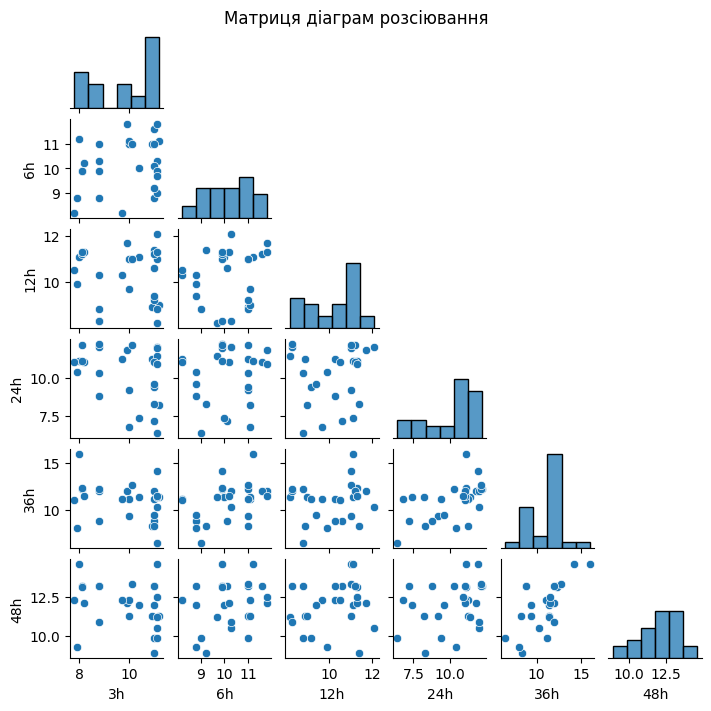

In [9]:
sns.pairplot(df, height=1.2, corner=True)
plt.suptitle("Матриця діаграм розсіювання")
plt.show()

#2) Графіки паралельних координат

In [10]:
X = df.copy()

In [11]:
df['y_kmeans'] = 1

In [12]:
df.head()

,3h,6h,12h,24h,36h,48h,y_kmeans
0,11.1,10.3,12.1,12.0,10.3,10.5,1
1,10.9,11.0,8.9,11.2,8.2,11.3,1
3,11.0,10.1,10.6,7.2,8.8,13.2,1
4,10.4,10.0,11.1,7.4,11.4,12.0,1
5,11.1,9.9,11.0,11.9,14.2,14.6,1


<Axes: >

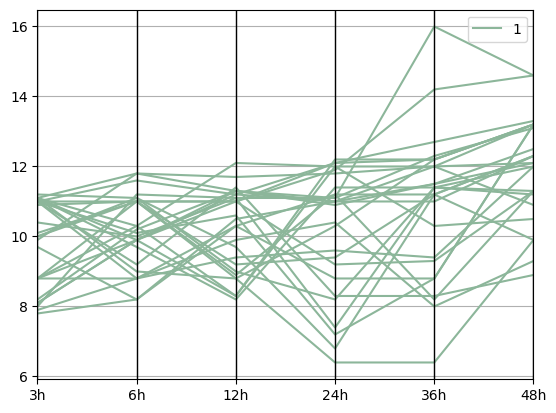

In [13]:
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols = X.columns)

In [14]:
fig = px.parallel_coordinates(df,labels={"3h": "3 години", "6h": "6 годин", "12h": "12 годин", "24h": "24 години", "36h": "36 годин", "48h": "48 годин"},title="Графік паралельних координат")
fig.show()

#3) K-means алгоритм кластеризації

[1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1]


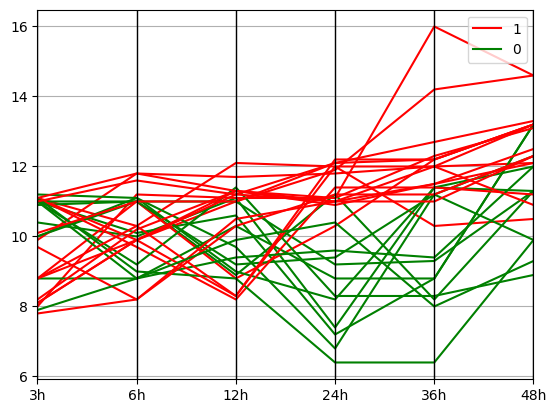

In [19]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)
df['y_kmeans'] = kmeans.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols = X.columns, color=colors)

print(kmeans.labels_)

[0 1 2 2 0 0 2 0 2 0 2 2 2 0 2 1 1 0 0 0 0 0 1 0 0 0 0 0]


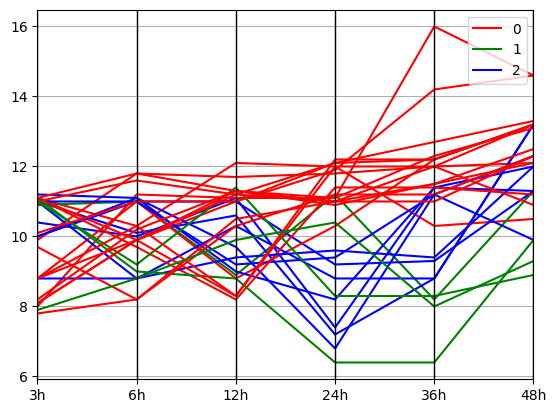

In [21]:
kmeans_3 = KMeans(n_clusters=3, n_init=10)
kmeans_3.fit(X)
df['y_kmeans'] = kmeans_3.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols = X.columns, color=colors)

print(kmeans_3.labels_)

[2 2 0 0 1 1 0 1 0 1 0 2 0 2 2 3 3 2 1 1 1 1 3 1 1 1 1 1]


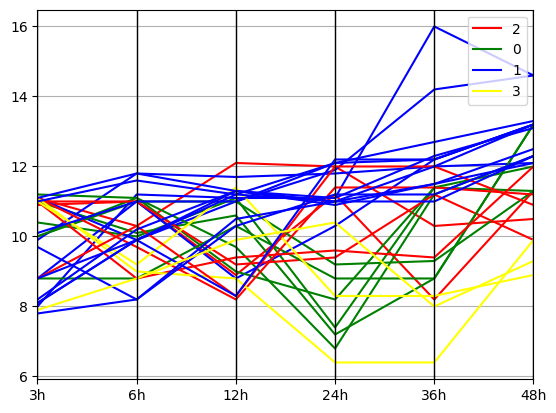

In [23]:
kmeans_4 = KMeans(n_clusters=4, n_init=10)
kmeans_4.fit(X)
df['y_kmeans'] = kmeans_4.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols = X.columns, color=colors)

print(kmeans_4.labels_)

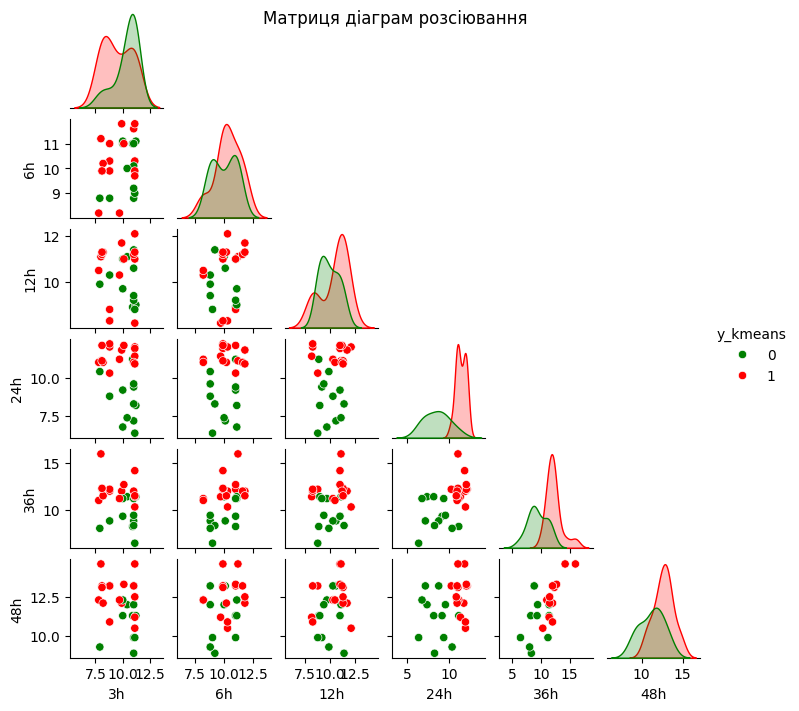

In [20]:
sns.pairplot(df,hue='y_kmeans',vars=X.columns,palette=dict(zip(df['y_kmeans'].unique(), colors[:df['y_kmeans'].nunique()])),height=1.2,corner=True)
plt.suptitle("Матриця діаграм розсіювання")
plt.show()

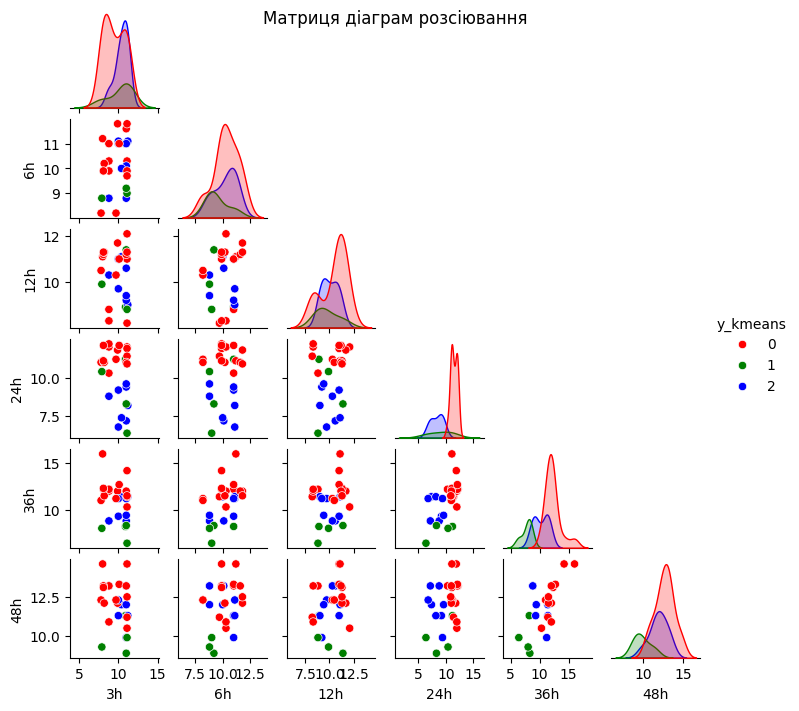

In [22]:
sns.pairplot(df,hue='y_kmeans',vars=X.columns,palette=dict(zip(df['y_kmeans'].unique(), colors[:df['y_kmeans'].nunique()])),height=1.2,corner=True)
plt.suptitle("Матриця діаграм розсіювання")
plt.show()

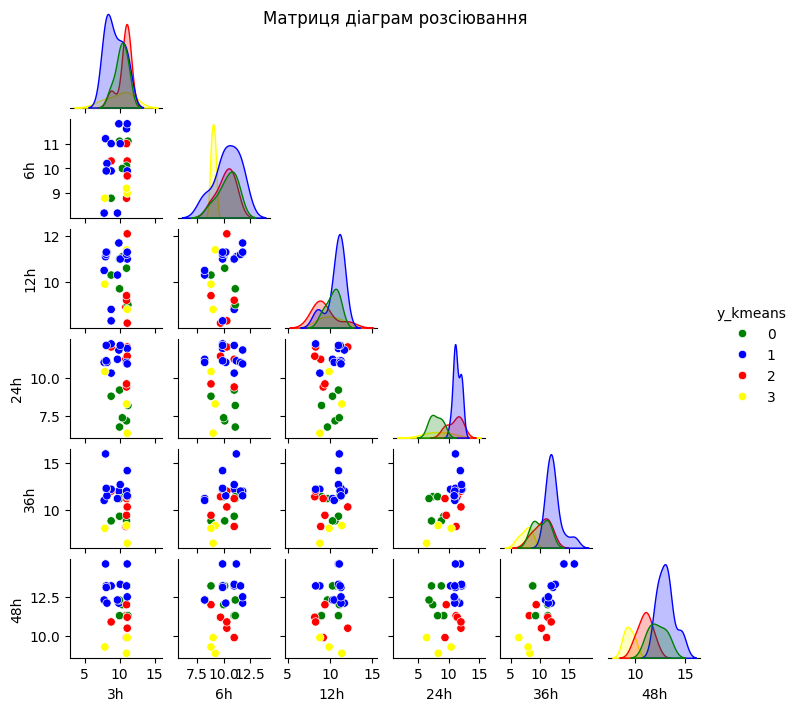

In [24]:
sns.pairplot(df,hue='y_kmeans',vars=X.columns,palette=dict(zip(df['y_kmeans'].unique(), colors[:df['y_kmeans'].nunique()])),height=1.2,corner=True)
plt.suptitle("Матриця діаграм розсіювання")
plt.show()

#4) Оцінки розбиттів

In [25]:
labels = kmeans.labels_
lanels_3 = kmeans_3.labels_
lanels_4 = kmeans_4.labels_

calinski_harabasz = calinski_harabasz_score(X, labels)
calinski_harabasz_3 = calinski_harabasz_score(X, lanels_3)
calinski_harabasz_4 = calinski_harabasz_score(X, lanels_4)

davies_bouldin = davies_bouldin_score(X, labels)
davies_bouldin_3 = davies_bouldin_score(X, lanels_3)
davies_bouldin_4 = davies_bouldin_score(X, lanels_4)

silhouette = silhouette_score(X, labels)
silhouette_3 = silhouette_score(X, lanels_3)
silhouette_4 = silhouette_score(X, lanels_4)

# Виведення результатів
print(f"Calinski-Harabasz Score: {calinski_harabasz:.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_3:.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_4:.2f}")
print(' ')
print(f"Davies-Bouldin Score: {davies_bouldin:.2f}")
print(f"Davies-Bouldin Score: {davies_bouldin_3:.2f}")
print(f"Davies-Bouldin Score: {davies_bouldin_4:.2f}")
print(' ')
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Silhouette Score: {silhouette_3:.2f}")
print(f"Silhouette Score: {silhouette_4:.2f}")

Calinski-Harabasz Score: 15.06
Calinski-Harabasz Score: 10.30
Calinski-Harabasz Score: 9.07
 
Davies-Bouldin Score: 1.26
Davies-Bouldin Score: 1.44
Davies-Bouldin Score: 1.32
 
Silhouette Score: 0.29
Silhouette Score: 0.23
Silhouette Score: 0.20


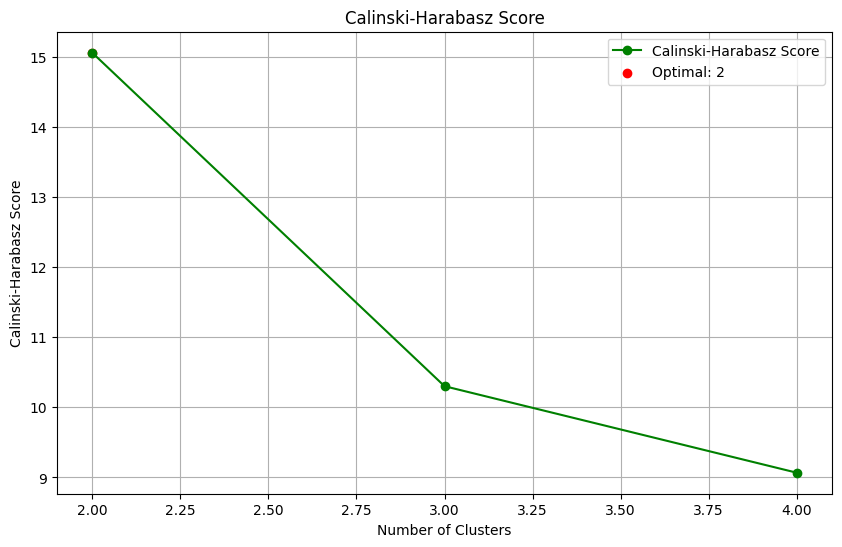

In [26]:
cluster_counts = [2, 3, 4]
silhouette_scores = [silhouette, silhouette_3, silhouette_4]
calinski_harabasz_scores = [calinski_harabasz, calinski_harabasz_3, calinski_harabasz_4]
davies_bouldin_scores = [davies_bouldin, davies_bouldin_3, davies_bouldin_4]

plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, calinski_harabasz_scores, marker='o', linestyle='-', color='g', label='Calinski-Harabasz Score')
optimal_ch = cluster_counts[calinski_harabasz_scores.index(max(calinski_harabasz_scores))]
plt.scatter(optimal_ch, max(calinski_harabasz_scores), color='red', label=f'Optimal: {optimal_ch}')
plt.title("Calinski-Harabasz Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.legend()
plt.grid()
plt.show()

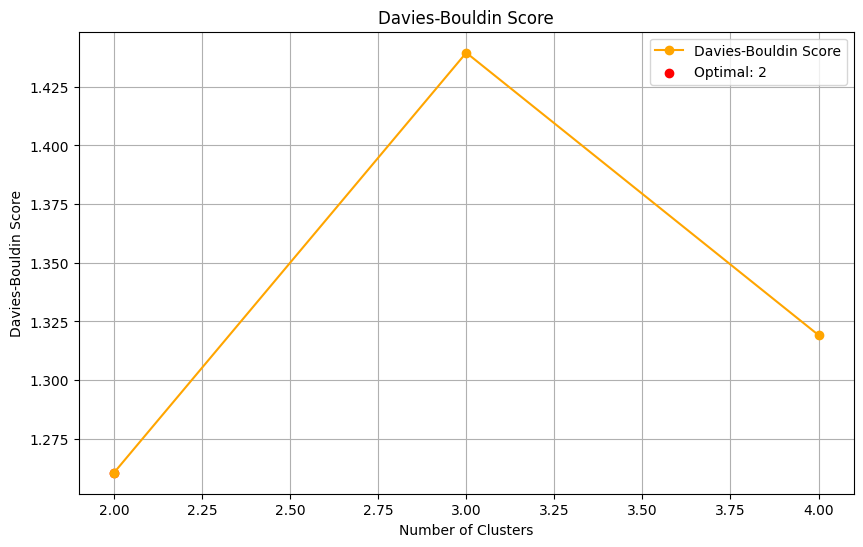

In [28]:
cluster_counts = [2, 3, 4]
silhouette_scores = [silhouette, silhouette_3, silhouette_4]
calinski_harabasz_scores = [calinski_harabasz, calinski_harabasz_3, calinski_harabasz_4]
davies_bouldin_scores = [davies_bouldin, davies_bouldin_3, davies_bouldin_4]

plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, davies_bouldin_scores, marker='o', linestyle='-', color='orange', label='Davies-Bouldin Score')
optimal_db = cluster_counts[davies_bouldin_scores.index(min(davies_bouldin_scores))]
plt.scatter(optimal_db, min(davies_bouldin_scores), color='red', label=f'Optimal: {optimal_db}')
plt.title("Davies-Bouldin Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Score")
plt.legend()
plt.grid()
plt.show()

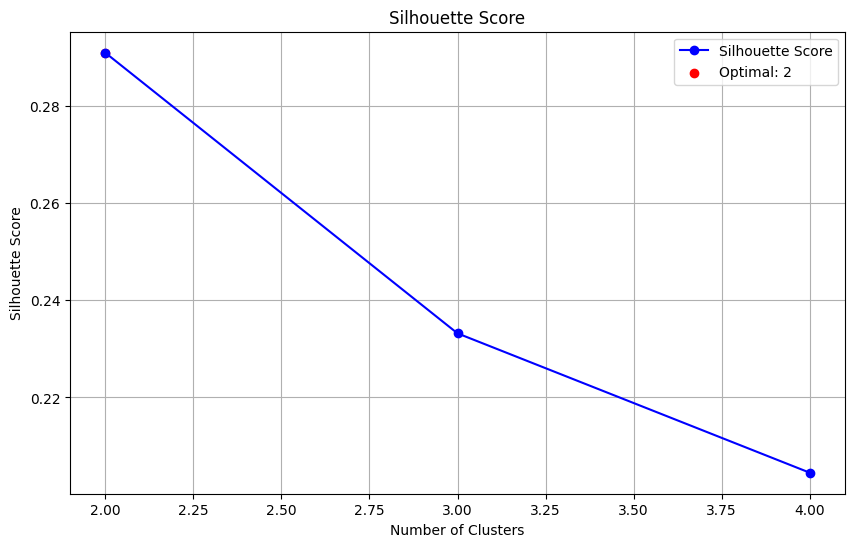

In [29]:
cluster_counts = [2, 3, 4]
silhouette_scores = [silhouette, silhouette_3, silhouette_4]
calinski_harabasz_scores = [calinski_harabasz, calinski_harabasz_3, calinski_harabasz_4]
davies_bouldin_scores = [davies_bouldin, davies_bouldin_3, davies_bouldin_4]

plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
optimal_silhouette = cluster_counts[silhouette_scores.index(max(silhouette_scores))]
plt.scatter(optimal_silhouette, max(silhouette_scores), color='red', label=f'Optimal: {optimal_silhouette}')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()

#5) Ієрархічний алгоритм кластеризації

In [30]:
df['y_agglo'] = 1
df

,3h,6h,12h,24h,36h,48h,y_kmeans,y_agglo
0,11.1,10.3,12.1,12.0,10.3,10.5,2,1
1,10.9,11.0,8.9,11.2,8.2,11.3,2,1
3,11.0,10.1,10.6,7.2,8.8,13.2,0,1
4,10.4,10.0,11.1,7.4,11.4,12.0,0,1
5,11.1,9.9,11.0,11.9,14.2,14.6,1,1
6,8.0,11.2,11.1,11.1,16.0,14.6,1,1
7,10.0,11.0,11.0,9.2,9.3,11.3,0,1
8,9.9,11.8,11.7,11.8,12.0,12.1,1,1
9,10.0,11.1,9.7,6.8,11.2,12.3,0,1
10,8.8,11.0,8.8,10.3,12.2,13.2,1,1


<Axes: >

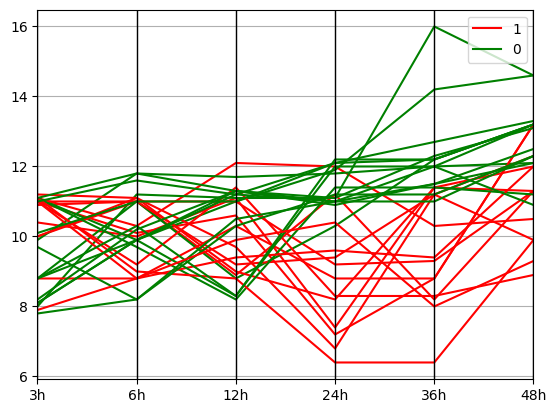

In [31]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo.fit(X)
df['y_agglo'] = agglo.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_agglo', cols = X.columns, color=colors)

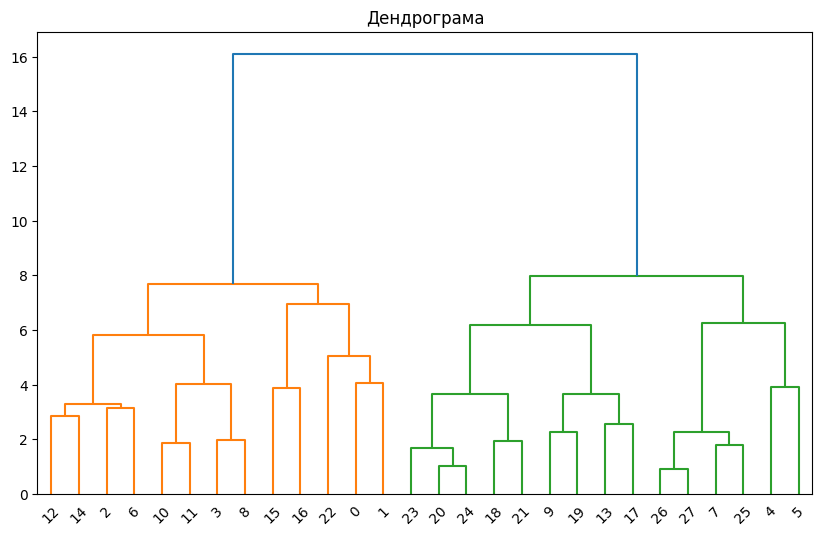

In [32]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(X, method='ward'))
plt.title("Дендрограма")
plt.show()

<Axes: >

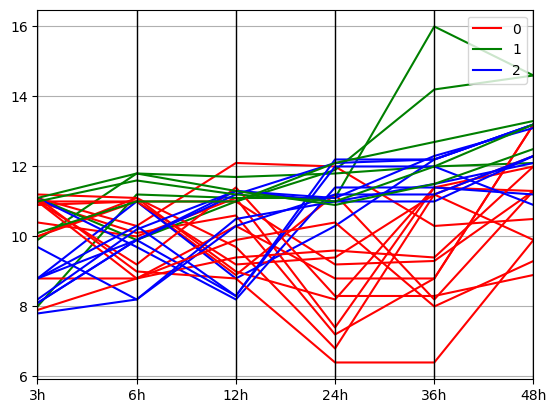

In [33]:
agglo_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_3.fit(X)
df['y_agglo'] = agglo_3.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_agglo', cols = X.columns, color=colors)

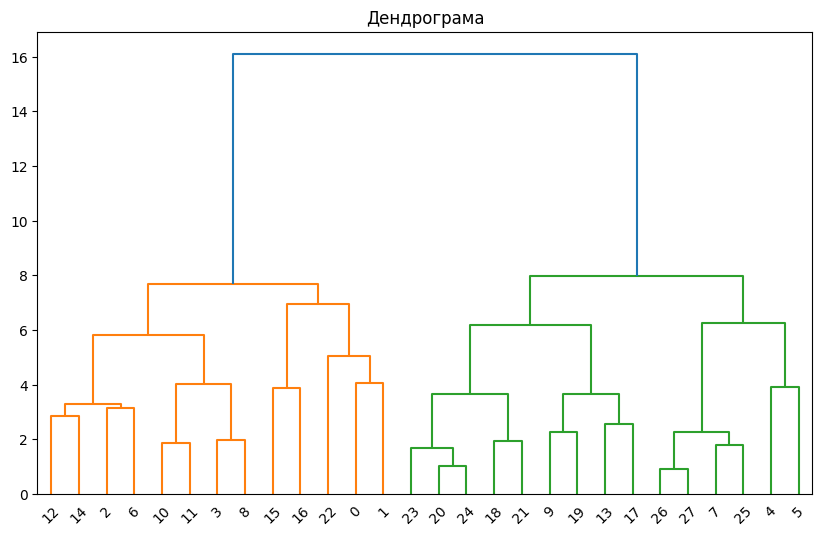

In [34]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(X, method='ward'))
plt.title("Дендрограма")
plt.show()

<Axes: >

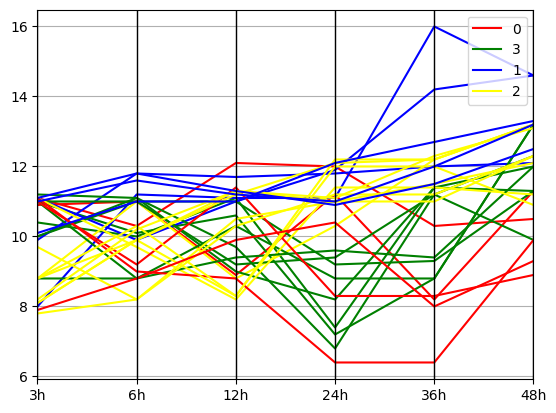

In [35]:
agglo_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_4.fit(X)
df['y_agglo'] = agglo_4.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_agglo', cols = X.columns, color=colors)

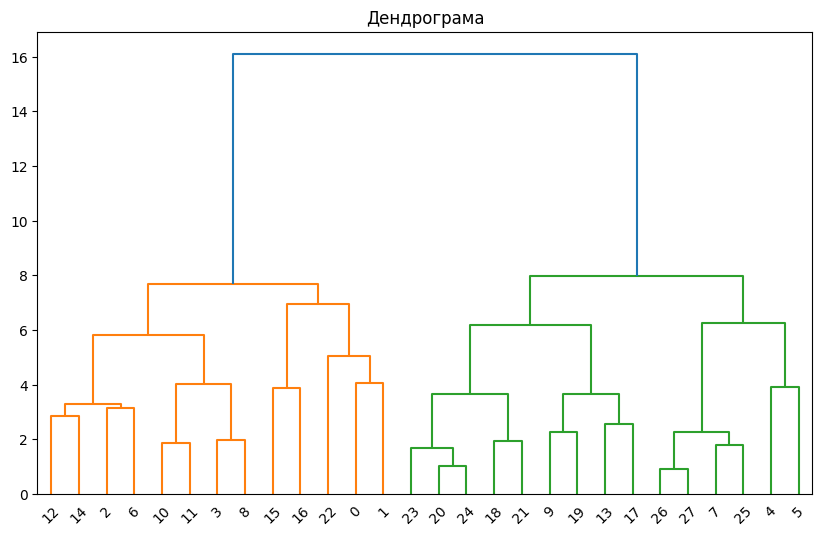

In [36]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(X, method='ward'))
plt.title("Дендрограма")
plt.show()

#6) Оцінка оптимальної кількості кластерів

In [37]:
labels = agglo.labels_
lanels_3 = agglo_3.labels_
lanels_4 = agglo_4.labels_

calinski_harabasz = calinski_harabasz_score(X, labels)
calinski_harabasz_3 = calinski_harabasz_score(X, lanels_3)
calinski_harabasz_4 = calinski_harabasz_score(X, lanels_4)

davies_bouldin = davies_bouldin_score(X, labels)
davies_bouldin_3 = davies_bouldin_score(X, lanels_3)
davies_bouldin_4 = davies_bouldin_score(X, lanels_4)

silhouette = silhouette_score(X, labels)
silhouette_3 = silhouette_score(X, lanels_3)
silhouette_4 = silhouette_score(X, lanels_4)

# Виведення результатів
print(f"Calinski-Harabasz Score: {calinski_harabasz:.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_3:.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_4:.2f}")
print(' ')
print(f"Davies-Bouldin Score: {davies_bouldin:.2f}")
print(f"Davies-Bouldin Score: {davies_bouldin_3:.2f}")
print(f"Davies-Bouldin Score: {davies_bouldin_4:.2f}")
print(' ')
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Silhouette Score: {silhouette_3:.2f}")
print(f"Silhouette Score: {silhouette_4:.2f}")

Calinski-Harabasz Score: 14.62
Calinski-Harabasz Score: 10.17
Calinski-Harabasz Score: 9.05
 
Davies-Bouldin Score: 1.28
Davies-Bouldin Score: 1.37
Davies-Bouldin Score: 1.59
 
Silhouette Score: 0.28
Silhouette Score: 0.21
Silhouette Score: 0.20


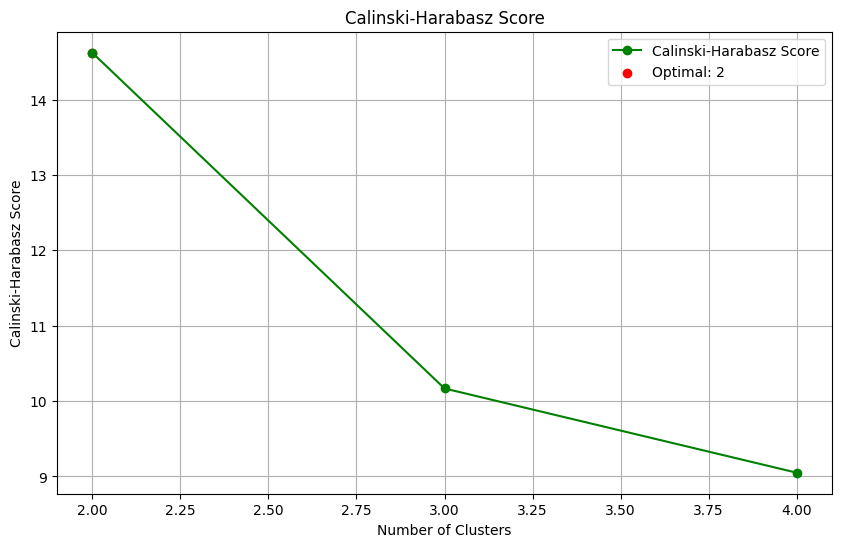

In [38]:
cluster_counts = [2, 3, 4]
silhouette_scores = [silhouette, silhouette_3, silhouette_4]
calinski_harabasz_scores = [calinski_harabasz, calinski_harabasz_3, calinski_harabasz_4]
davies_bouldin_scores = [davies_bouldin, davies_bouldin_3, davies_bouldin_4]

plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, calinski_harabasz_scores, marker='o', linestyle='-', color='g', label='Calinski-Harabasz Score')
optimal_ch = cluster_counts[calinski_harabasz_scores.index(max(calinski_harabasz_scores))]
plt.scatter(optimal_ch, max(calinski_harabasz_scores), color='red', label=f'Optimal: {optimal_ch}')
plt.title("Calinski-Harabasz Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.legend()
plt.grid()
plt.show()

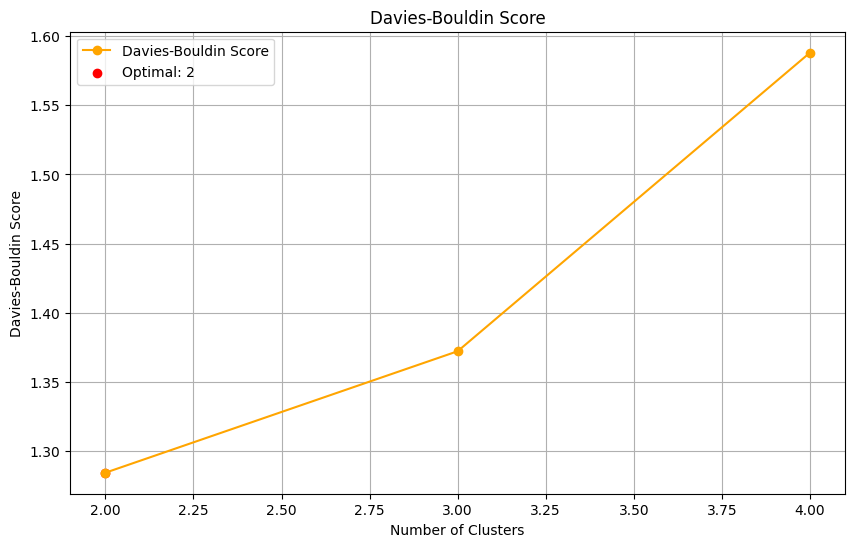

In [39]:
cluster_counts = [2, 3, 4]
silhouette_scores = [silhouette, silhouette_3, silhouette_4]
calinski_harabasz_scores = [calinski_harabasz, calinski_harabasz_3, calinski_harabasz_4]
davies_bouldin_scores = [davies_bouldin, davies_bouldin_3, davies_bouldin_4]

plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, davies_bouldin_scores, marker='o', linestyle='-', color='orange', label='Davies-Bouldin Score')
optimal_db = cluster_counts[davies_bouldin_scores.index(min(davies_bouldin_scores))]
plt.scatter(optimal_db, min(davies_bouldin_scores), color='red', label=f'Optimal: {optimal_db}')
plt.title("Davies-Bouldin Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Score")
plt.legend()
plt.grid()
plt.show()

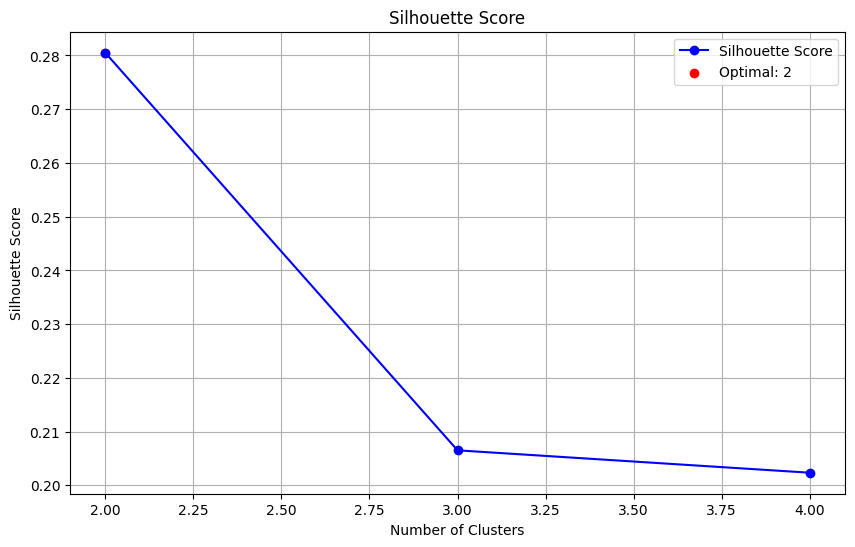

In [40]:
cluster_counts = [2, 3, 4]
silhouette_scores = [silhouette, silhouette_3, silhouette_4]
calinski_harabasz_scores = [calinski_harabasz, calinski_harabasz_3, calinski_harabasz_4]
davies_bouldin_scores = [davies_bouldin, davies_bouldin_3, davies_bouldin_4]

plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
optimal_silhouette = cluster_counts[silhouette_scores.index(max(silhouette_scores))]
plt.scatter(optimal_silhouette, max(silhouette_scores), color='red', label=f'Optimal: {optimal_silhouette}')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()

#7) Порівняння ієрархічної кластеризації та k-means

[1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1]


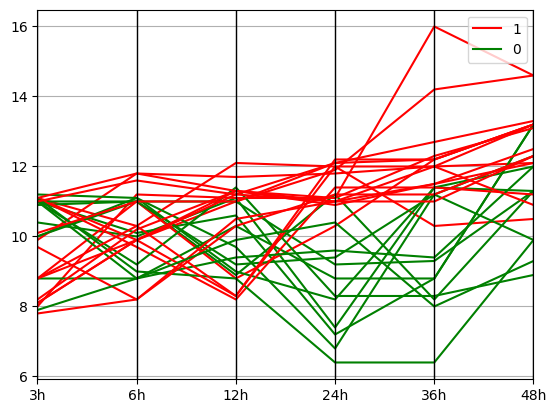

In [41]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)
df['y_kmeans'] = kmeans.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols = X.columns, color=colors)

print(kmeans.labels_)

[1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0]


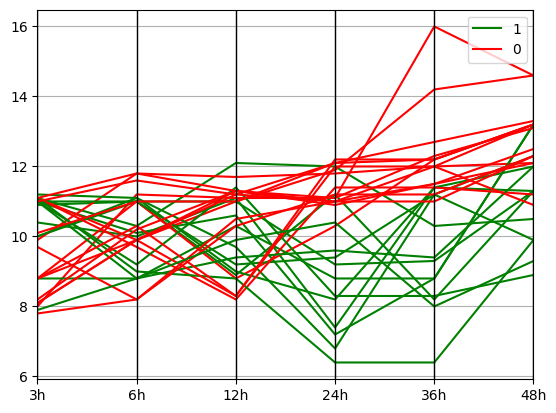

In [43]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo.fit(X)
df['y_agglo'] = agglo.labels_

colors= [ 'green','red', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_agglo', cols = X.columns, color=colors)

print(agglo.labels_)

In [44]:
adjusted_rand_score(df['y_kmeans'], df['y_agglo'])

0.8570708343836653

[2 0 0 0 2 2 0 2 0 2 0 0 0 2 0 1 1 2 2 2 2 2 1 2 2 2 2 2]


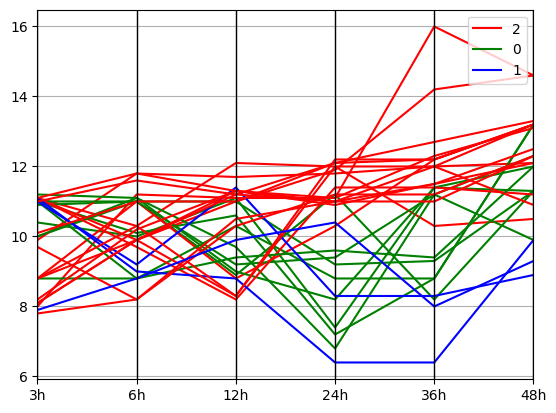

In [45]:
kmeans_3 = KMeans(n_clusters=3, n_init=10)
kmeans_3.fit(X)
df['y_kmeans'] = kmeans_3.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols = X.columns, color=colors)

print(kmeans_3.labels_)

<Axes: >

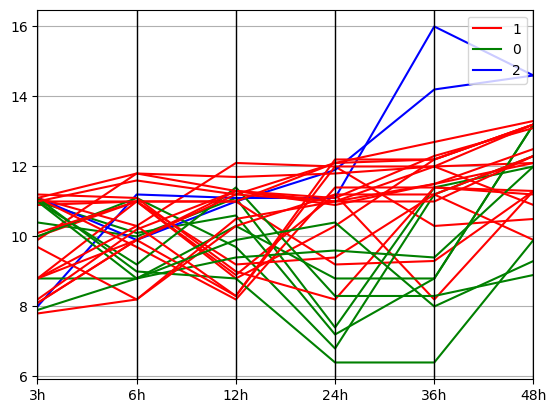

In [46]:
agglo_3 = AgglomerativeClustering(n_clusters=3, linkage='complete')
agglo_3.fit(X)
df['y_agglo'] = agglo_3.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_agglo', cols = X.columns, color=colors)

In [47]:
adjusted_rand_score(df['y_kmeans'], df['y_agglo'])

0.3666469544648137

[3 0 0 2 3 3 0 3 2 1 2 2 0 1 0 0 0 1 1 1 3 1 0 3 3 3 3 3]


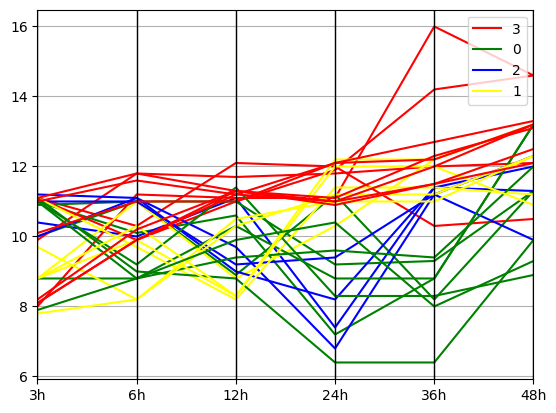

In [48]:
kmeans_4 = KMeans(n_clusters=4, n_init=10)
kmeans_4.fit(X)
df['y_kmeans'] = kmeans_4.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols = X.columns, color=colors)

print(kmeans_4.labels_)

[0 0 3 3 1 1 3 1 3 2 3 3 3 2 3 0 0 2 2 2 2 2 0 2 2 1 1 1]


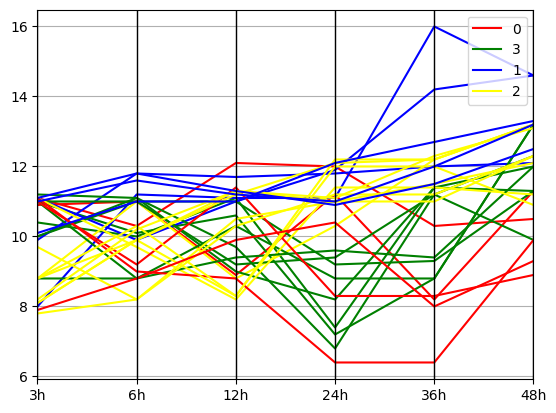

In [49]:
agglo_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_4.fit(X)
df['y_agglo'] = agglo_4.labels_

colors= ['red', 'green', 'blue', 'yellow', 'purple']
pd.plotting.parallel_coordinates(df, 'y_agglo', cols = X.columns, color=colors)

print(agglo_4.labels_)

In [50]:
adjusted_rand_score(df['y_kmeans'], df['y_agglo'])

0.41615499027497044

Висновки: в ході роботи було проведено дослідження щодо оптимальної кількості кластерів для датасету з пацієнтами та заміром рівня глюкози к крові зі зниженної темпертаутрою 32 градуса упродовж 48 годин. Оптимальної кількості вийшло 2 кластера , оцінка за допомогою calinski_harabasz ,davies_bouldin
silhouette, де опитамальної кількості вийшло 2 класи. В кінці також було проведено порівняня двох алгоритмів. На розбитті для 2 класетрів adjusted_rand_score показує не погані результати близької до 1.